# Mathematical Underpinnings - Lab 1

## Task 1
### a) Generative approach 

We know $\pi = P(Y=1)$ and the distributions $f(x|Y=1)$ and $f(x|Y=-1)$.

#### First bullet point

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
# sampling from multivariate normal distribution and from Bernoulli

# x = np.random.multivariate_normal(np.array([0,0]), np.eye(2), 5)
# y = np.random.binomial(1, 0.5, 5)
# x, y

In [3]:
m1 = np.array([1,1])
m2 = np.array([0,0])

sigma = np.array([[1, -0.5],[-0.5, 1]])

In [4]:
# sampling
np.random.seed(123)
n1 = 500
n2 = 500
x1 = np.random.multivariate_normal(m1, sigma, n1)
x2 = np.random.multivariate_normal(m2, sigma, n2)
X_generative = np.vstack([x1, x2])
Y_generative = np.concatenate([np.ones(n1), np.zeros(n2)])

In [5]:
# alternatively
n = 1000
pi1 = 0.5
Y_generative = np.random.binomial(1, pi1, size=n)
X_generative = (np.random.multivariate_normal(m1, sigma, n).T*Y_generative + np.random.multivariate_normal(m2, sigma, n).T*(1-Y_generative)).T

Does the distribution of $P(Y=1|X=x)=p(y=1|x)$ correspond to a logistic model?

A hint: Use Bayes theorem to compute $p(y=1|x)$. Is it possible to represent $p(y=1|x)$ as $\frac{e^{\beta_0 + \beta x}}{1 + e^{\beta_0 + \beta x}}$?


**Answer:** Yes. We have that

$$p(x|y=1) = (2\pi)^{-d/2} \textrm{det}(\Sigma)^{-d/2} \exp(-(x-m_1)'\Sigma^{-1}(x-m_1)/2) = C\exp(-(x-m_1)'\Sigma^{-1}(x-m_1)/2)$$
and
$$p(x|y=-1) = (2\pi)^{-d/2} \textrm{det}(\Sigma)^{-d/2} \exp(-(x-m_2)'\Sigma^{-1}(x-m_2)/2) = C\exp(-(x-m_2)'\Sigma^{-1}(x-m_2)/2).$$
Thus
$$p(y=1|x) = \frac{\pi p(x|y=1)}{p(x)} = \frac{\pi p(x|y=1)}{\pi p(x|y=1) + (1-\pi) p(x|y=-1)} = \frac{\pi p(x|y=1)/(1-\pi) p(x|y=-1)}{\pi p(x|y=1)/(1-\pi) p(x|y=-1) + 1}.$$
The nominator equals
$$\pi p(x|y=1)/(1-\pi) p(x|y=-1) = \exp(x'\Sigma^{-1}m_1 + \log(\pi/(1-\pi)) + m_2'\Sigma^{-1}m_2/2 -  m_1'\Sigma^{-1}m_1/2),$$
hence
$$\beta_0=\log(\pi/(1-\pi)) + m_2'\Sigma^{-1}m_2/2 -  m_1'\Sigma^{-1}m_1/2,$$
$$\beta = \Sigma^{-1}(m_1 - m_2).$$

#### Second bullet point

Find the formulas for the parameters of the logistic model (the coefficients and the intercept).

A hint: Use the representation of $p(y=1|x)$ from the first bullet point and solve for $\beta_0$ and $\beta$.

**Answer:** See above.

In [6]:
# computing beta_0 and beta using the formulas

sigma_inv = np.linalg.inv(sigma)
beta = sigma_inv.dot(m1 - m2)
pi1 = 0.5
beta0 = np.log(pi1) - np.log(1 - pi1) + m2.dot(sigma_inv.dot(m2))/2 - m1.dot(sigma_inv.dot(m1))/2
(beta0, beta)

(-2.0, array([2., 2.]))

In [7]:
# a logistic model
mod_a = LogisticRegression(penalty=None)
mod_a.fit(X_generative, Y_generative)
(mod_a.intercept_, mod_a.coef_)

(array([-2.00328412]), array([[2.1373527 , 1.99196848]]))

### b) Discriminative approach

We know $f(x)$ and $P(Y=1|X=x)$.

#### First bullet point

In [8]:
# sampling
n = 1000
x1 = np.random.multivariate_normal(m1, sigma, n)
x2 = np.random.multivariate_normal(m2, sigma, n)
mixture_coef = np.random.binomial(1, 0.5, n)
X_discriminative = np.vstack((x1[mixture_coef == 0,:], x2[mixture_coef == 1,:]))
probability_y = 1/(1+np.exp(-(-2 + np.dot(X_discriminative, np.array([2,2])))))
Y_discriminative = np.random.binomial(1, probability_y, n)

In [9]:
mod_b = LogisticRegression(penalty=None)
mod_b.fit(X_discriminative, Y_discriminative)
(mod_b.intercept_, mod_b.coef_)

(array([-1.86938779]), array([[1.91210441, 1.99456076]]))

#### Second bullet point

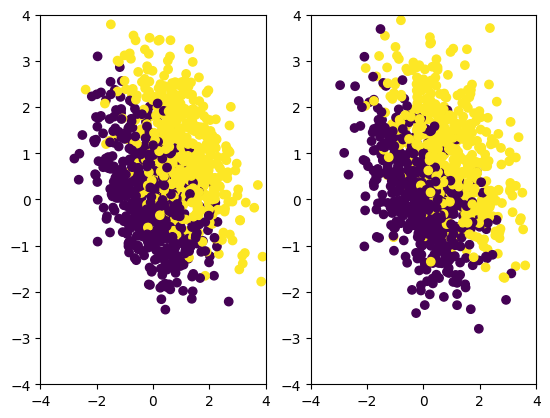

In [42]:
plt.subplot(1, 2, 1)
plt.scatter(X_generative[:,0], X_generative[:,1], c=Y_generative)
plt.ylim(-4,4)
plt.xlim(-4,4)
plt.subplot(1, 2, 2)
plt.scatter(X_discriminative[:,0], X_discriminative[:,1], c=Y_discriminative)
plt.ylim(-4,4)
plt.xlim(-4,4)
plt.show()

What distinguishes the generative approach from the discriminative approach?

**Answer:** We have the same joint distributions of $p(x,y)$ (as seen in scatterplots), but the two approches differ from a simulation and modeling point of view. For example, in generative approach we cannot estimate $\pi$. In generative approach $\pi$ and $beta_0$ are entangled as indicated by the formulas in a). 

### c)

To sample from $f_{X|Y=-1}$, first, we will give an answer to Q1.

Q1. A hint: use Bayes theorem for $p(x|y=-1)$ and use law of total probability for $p(x)$.

**Answer:** We can use a formula, we obtained in a)

$$p(y=1|x) = \frac{\pi p(x|y=1)}{\pi p(x|y=1) + (1-\pi) p(x|y=-1)}.$$

Now we transform to get a formula for $p(x|y=-1)$:

$$ p(x|y=-1) = \frac{\pi p(x|y=1) (1- p(y=1|x))}{p(y=1|x)(1-\pi)}.$$

We plug in $p(x|y=1) = \exp(-x)$ as $X$ given $Y=1$ follows an exponential distribution with $\lambda=1$, $p(y=1|x) = 1/(1+\exp(-\beta_0-\beta_1 x))$ (a logistic model assumption) and $p(y=-1|x) = 1/(1+\exp(\beta_0+\beta_1 x))$, thus

$$ p(x|y=-1) = \frac{\pi \exp(-x)}{\exp(\beta_0+\beta_1 x)(1-\pi)} = C_{\beta_0, \pi} \exp(-(\beta_1+1)x).$$

$X$ given $Y=-1$ also follows exponential distribution with $\lambda=\beta_1+1$.

------

Q2, Q3. A hint: what is the distribution of $f_{X|Y=-1}$? What ia a norming constant?

------
If that is doable, given $\beta_1$ and $\pi$ compute $\beta_0$.

A hint: Of course it is, compute $\beta_0$.

Homework: find $C_{\beta_0, \pi}$. Next, knowing that $C_{\beta_0, \pi} = \beta_1+1$, derive the formula for $\beta_0$.

--- 
HOMEWORK SOLUTION
--- 

> Q2. Once π is fixed, do we have freedom to choose an intercept in the logistic model thus constructed?

> Q3. If π is not given, is the intercept in the logistic model uniquely determined?

From earlier we have that

$$ p(x|y=-1) = \frac{\pi \exp(-x)}{\exp(\beta_0+\beta_1 x)(1-\pi)} = C_{\beta_0, \pi} \exp(-(\beta_1+1)x).$$

and thus we get that

$$C_{\beta_0, \pi} = \frac{\pi}{1-\pi} \exp(-\beta_0).$$

Then, knowing that $C_{\beta_0, \pi} = \beta_1+1$, we get that

$$\beta_1+1 = C_{\beta_0, \pi} = \frac{\pi}{1-\pi} \exp(-\beta_0)$$

and we can do the following transformations to get $\beta_0$:

$$\beta_1+1 = \frac{\pi}{1-\pi} \exp(-\beta_0)$$

$$\exp(\beta_0) = \frac{\pi}{1-\pi}\frac{1}{\beta_1+1}$$

$$\beta_0 = \log(\frac{\pi}{(1-\pi)(\beta_1+1)})$$

Plugging in fixed values from this task: $\beta_1=1$ and $\pi=1/3$, which comes from:

$\pi = p(y=1)$, which in our case can be derived as $\pi = \frac{n_1}{n_1+n_2} = \frac{1000}{2000} = \frac{1}{3}$, 

we obtain that

$$\beta_0 = \log(\frac{1/3}{2/3 \times 2}) = \log(\frac{1}{4}) = -\log(4) = -2\log(2) = -2\cdot 0.6931 = -1.3862.$$

> Homework answers: $\beta_0 = -\log(4)$.

> Q2 answer: Intercept depends on $\beta_0$ and $\pi$. With fixed $\pi$, we have freedom to choose $\beta_0$ as long, as we also adjust $\beta_1$. With fixed both $\pi$ and $\beta_1$, we do not have freedom to choose $\beta_0$.

> Q3 answer: Intercept in the logistic model is uniquely determined by $\pi$ and $\beta_1$. Without $\pi$, we cannot determine $\beta_0$.

---

In [43]:
# sampling

beta1 = 1
n1 = 1000
x1 = np.random.exponential(1, size=n1)
n2 = 2000
x2 = np.random.exponential(1/(beta1 + 1), size=n2)
X = np.concatenate([x1, x2]).reshape(-1, 1)
y = np.concatenate([np.ones(n1), np.zeros(n2)])

In [44]:
# a model
mod = LogisticRegression(penalty=None)
mod.fit(X, y)
(mod.intercept_, mod.coef_)

(array([-1.41687531]), array([[1.04573334]]))

In [48]:
# a numeric answer to the question about beta0
pi_c = n1 / (n1 + n2)
-np.log((1 - pi_c)/pi_c * (beta1 + 1))

-1.3862943611198908